# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hdbscan 
import umap
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time
import utils

In [2]:
import utils

# Data

In [3]:
%%time
# Read
raw = pd.read_csv('../data/product.zip')
print('size before drop na: ', len(raw))
raw = raw.dropna()
print('size after drop na: ', len(raw))
raw.reset_index(drop=True, inplace=True)
raw.head()

size before drop na:  8471220
size after drop na:  8471220
Wall time: 25.8 s


order_id                           user_id  \
0  cfcd208495d565ef66e7dff9f98764da  c81e728d9d4c2f636f067f89cc14862c   
1  c4ca4238a0b923820dcc509a6f75849b  eccbc87e4b5ce2fe28308fd9f2a7baf3   
2  c81e728d9d4c2f636f067f89cc14862c  eccbc87e4b5ce2fe28308fd9f2a7baf3   
3  eccbc87e4b5ce2fe28308fd9f2a7baf3  eccbc87e4b5ce2fe28308fd9f2a7baf3   
4  a87ff679a2f3e71d9181a67b7542122c  eccbc87e4b5ce2fe28308fd9f2a7baf3   

                            page_id           product site_version  \
0  6f4922f45568161a8cdf4ad2299f6d23          sneakers      desktop   
1  4e732ced3463d06de0ca9a15b6153677          sneakers      desktop   
2  5c45a86277b8bf17bff6011be5cfb1b9  sports_nutrition      desktop   
3  fb339ad311d50a229e497085aad219c7           company      desktop   
4  fb339ad311d50a229e497085aad219c7           company      desktop   

                  time         title  target  
0  2019-01-11 09:24:43  banner_click       0  
1  2019-01-09 09:38:51   banner_show       0  
2  2019-01-09 09:12:45   banner_show       0  
3  2019-01-03 08:58:18   banner_show       0  
4  2019-01-03 08:59:15  banner_click       0

# Scratch

In [5]:
len(raw['order_id'].unique())

8471220

In [6]:
len(raw['user_id'].unique())

4254619

In [7]:
len(raw['page_id'].unique())

7393316

In [13]:
raw['time'].min()

'2019-01-01 00:00:03'

In [15]:
raw['time'].max()

'2019-05-31 23:59:58'

In [8]:
raw['product'].value_counts()

clothes             1786438
company             1725056
sneakers            1703342
sports_nutrition    1634625
accessories         1621759
Name: product, dtype: int64

In [9]:
raw['site_version'].value_counts()

mobile     6088335
desktop    2382885
Name: site_version, dtype: int64

In [10]:
raw['title'].value_counts()

banner_show     7393314
banner_click     829184
order            248722
Name: title, dtype: int64

In [11]:
raw['target'].value_counts()

0    8222498
1     248722
Name: target, dtype: int64

In [16]:
%%time
counts = raw.groupby(['user_id']).count()
counts.head()

order_id  page_id  product  site_version  \
user_id                                                                      
0000023f507999464aa2b78875b7e5d6         1        1        1             1   
000009891526c0ade7180f8423792063         1        1        1             1   
00000ce845c00cbf0686c992fc369df4         1        1        1             1   
00000f7264c27ba6fea0c837ed6aa0aa         1        1        1             1   
0000104cd168386a335ba6bf6e32219d         4        4        4             4   

                                  time  title  target  
user_id                                                
0000023f507999464aa2b78875b7e5d6     1      1       1  
000009891526c0ade7180f8423792063     1      1       1  
00000ce845c00cbf0686c992fc369df4     1      1       1  
00000f7264c27ba6fea0c837ed6aa0aa     1      1       1  
0000104cd168386a335ba6bf6e32219d     4      4       4

In [17]:
counts['order_id'].value_counts()

1     2290685
2      977829
3      502941
4      208923
5       98954
6       59760
7       43052
8       27283
9       15030
10       8293
11       5452
12       4191
13       3544
14       3075
15       2435
16       1629
17        899
18        410
19        148
20         58
21         23
22          4
23          1
Name: order_id, dtype: int64

# Wrapper

## Round 1

In [5]:
# Variables
RANDOM_SEED = 1
MIN_CLUSTER_SIZE = 250
MIN_SAMPLES = MIN_CLUSTER_SIZE

# Hyperparams
hypers_hdbscan = {
    "prediction_data": True,
    "min_cluster_size": MIN_CLUSTER_SIZE,
    "min_samples": MIN_SAMPLES
}

# Features
features = [
    'BALANCE',
    'BALANCE_FREQUENCY',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT',
    'TENURE'
]
features.sort()

Wall time: 28.2 s


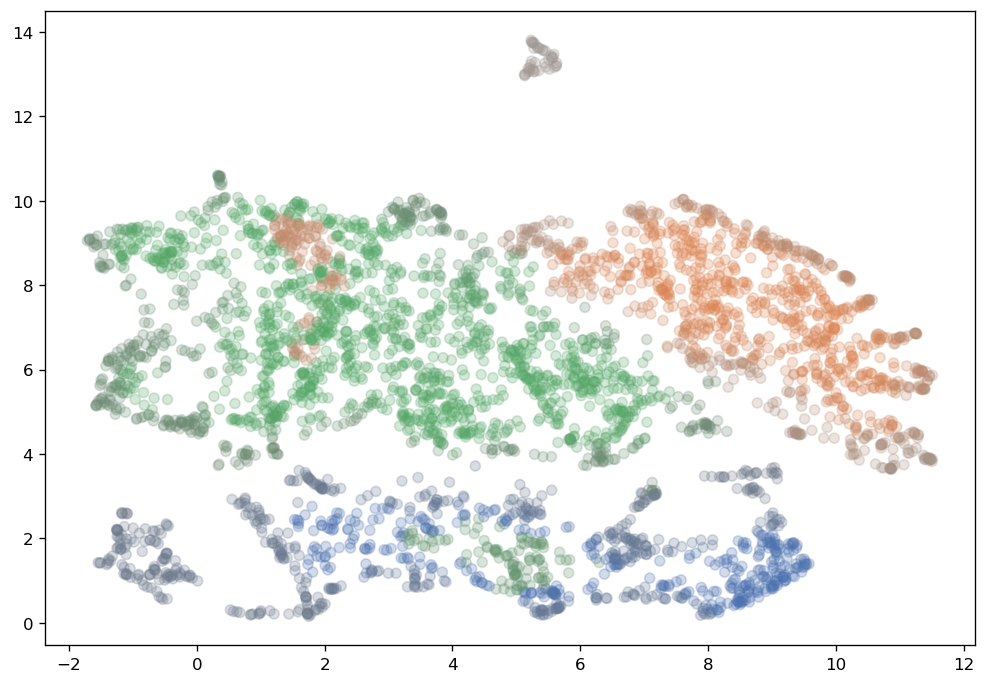

In [7]:
%%time
# Run
output = utils.clustering_wrapper(
    raw,
    features,
    RANDOM_SEED,
    hypers_hdbscan,
    plot_sample_size = 4000
)

In [20]:
output['metrics']

{'n_clusters': 3,
 'percent_clustered': 68.29550717924965,
 'sil_score': 0.4603449,
 'pielou_evenness': 0.8948715546338087}

## Round 2

In [21]:
# Variables
RANDOM_SEED = 1
MIN_CLUSTER_SIZE = 500
MIN_SAMPLES = MIN_CLUSTER_SIZE

# Hyperparams
hypers_hdbscan = {
    "prediction_data": True,
    "min_cluster_size": MIN_CLUSTER_SIZE,
    "min_samples": MIN_SAMPLES
}

# Features
features = [
    'BALANCE',
    'BALANCE_FREQUENCY',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT',
    'TENURE'
]
features.sort()

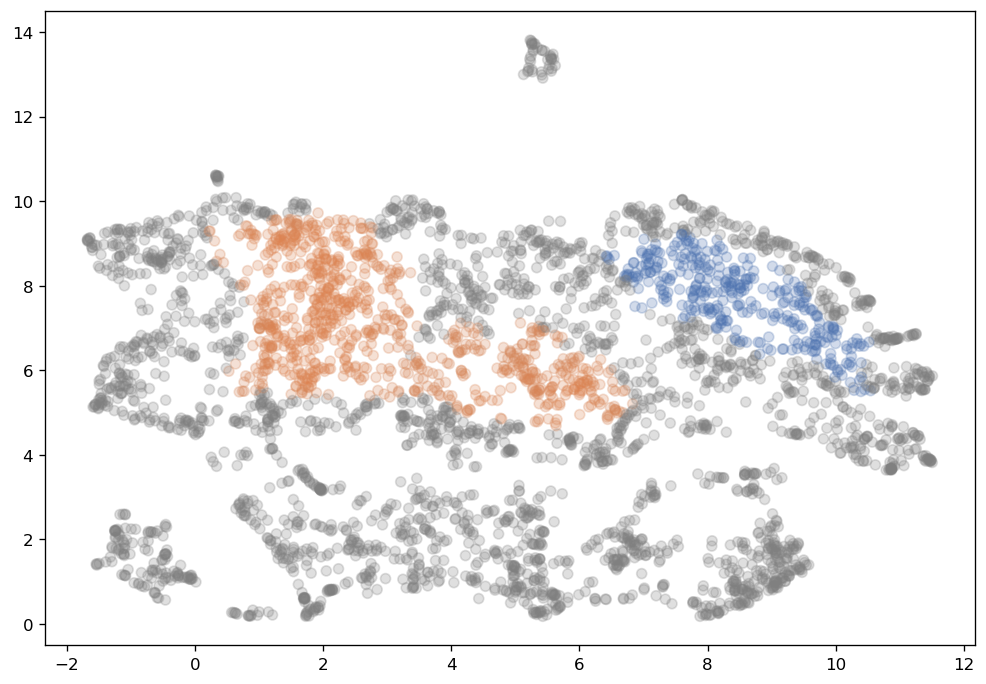

In [107]:
%%time
# Run
output = utils.clustering_wrapper(
    raw,
    features,
    RANDOM_SEED,
    hypers_hdbscan,
    plot_sample_size = 4000
)

In [108]:
output['metrics']

{'n_clusters': 2,
 'percent_clustered': 29.87494210282538,
 'sil_score': 0.55901957,
 'pielou_evenness': 0.8676171914797105}

# ARI

## Full model

In [8]:
# Variables
RANDOM_SEED = 1
MIN_CLUSTER_SIZE = 250
MIN_SAMPLES = MIN_CLUSTER_SIZE
FORCE_PREDICT = True
INCLUDE_NOISE = False

# Hyperparams
hypers_hdbscan = {
    "prediction_data": True,
    "min_cluster_size": MIN_CLUSTER_SIZE,
    "min_samples": MIN_SAMPLES
}

# Features
features = [
    'BALANCE',
    'BALANCE_FREQUENCY',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT',
    'TENURE'
]
features.sort()

Wall time: 21.7 s


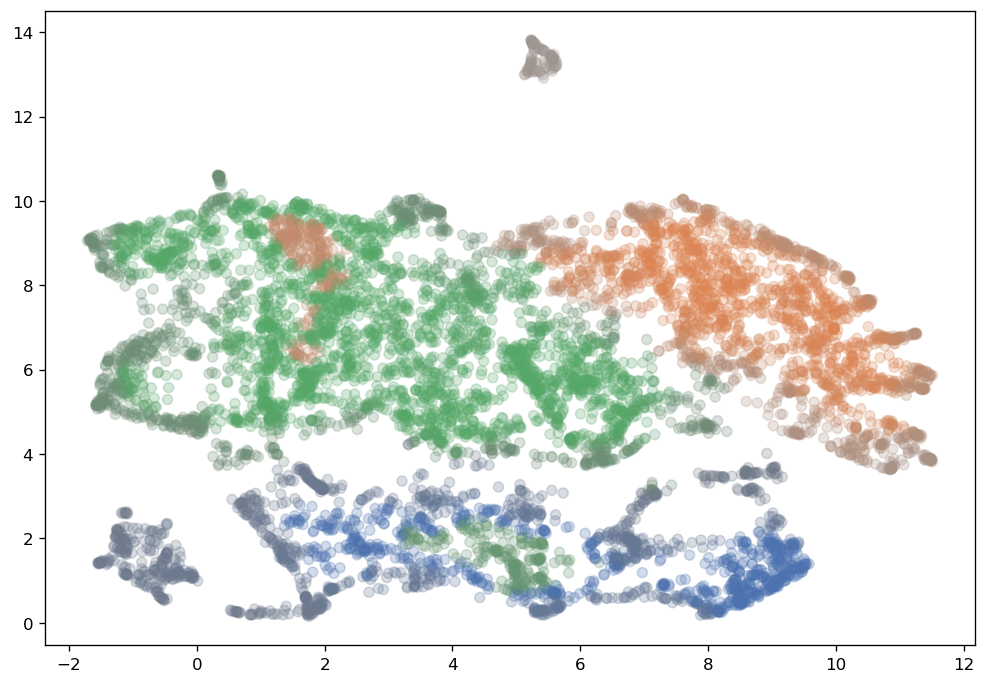

In [9]:
%%time
# Full model
output = utils.clustering_wrapper(
    raw,
    features,
    RANDOM_SEED,
    hypers_hdbscan,
    plot_sample_size = 8000,
    force_predict = FORCE_PREDICT,
    include_noise = INCLUDE_NOISE
    
)

In [10]:
# Get scores
scores = output['scores']
scores.head(3)

CUST_ID     score  cluster         0         1   BALANCE  BALANCE_FREQUENCY  \
0  C10001  0.394106        0  5.069434  3.115530 -0.744625          -0.370047   
1  C10002  0.988302        1  8.298335  8.154735  0.764152           0.067679   
2  C10003  0.483396        2  3.269318  9.496077  0.426602           0.505405   

   CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  ...  \
0     -0.468655               -0.681953         -0.479437  ...   
1      2.568556                0.557022          0.099258  ...   
2     -0.468655               -0.681953         -0.479437  ...   

   MINIMUM_PAYMENTS  ONEOFF_PURCHASES  ONEOFF_PURCHASES_FREQUENCY  PAYMENTS  \
0         -0.305508         -0.359160                   -0.686280 -0.543942   
1          0.087689         -0.359160                   -0.686280  0.796852   
2         -0.099906          0.099909                    2.646651 -0.399503   

   PRC_FULL_PAYMENT  PURCHASES  PURCHASES_FREQUENCY  \
0         -0.537727  -0.429184            -0.820769   
1          0.212380  -0.473208            -1.236139   
2         -0.537727  -0.116413             1.256077   

   PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX    TENURE  
0                         -0.717179      -0.517623  0.355181  
1                         -0.926522      -0.597054  0.355181  
2                         -0.926522      -0.120467  0.355181  

[3 rows x 22 columns]

In [11]:
output['metrics']

{'n_clusters': 3,
 'percent_clustered': 100.0,
 'sil_score': 0.28752503,
 'pielou_evenness': 0.9546506767396167}

In [12]:
scores['cluster'].value_counts()

2    4158
1    2483
0    1995
Name: cluster, dtype: int64

## Sub model

In [13]:
# Sample

SAMPLE_SEED = 1
SUB_SAMPLE_SIZE = 0.5
SUB_SAMPLE_INT = int(len(raw)*SUB_SAMPLE_SIZE)
# Sample df
sample = raw.sample(SUB_SAMPLE_INT, random_state=SAMPLE_SEED)
sample.sort_values(['CUST_ID'], inplace=True)

In [14]:
sample.head(3)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3  C10005   817.714335                1.0      16.00             16.00   
4  C10006  1809.828751                1.0    1333.28              0.00   
5  C10007   627.260806                1.0    7091.01           6402.63   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                    0.00           0.0             0.083333   
4                 1333.28           0.0             0.666667   
5                  688.38           0.0             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                    0.083333                          0.000000   
4                    0.000000                          0.583333   
5                    1.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                     0.0                 0              1        1200.0   
4                     0.0                 0              8        1800.0   
5                     0.0                 0             64       13500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3   678.334763        244.791237               0.0      12  
4  1400.057770       2407.246035               0.0      12  
5  6354.314328        198.065894               1.0      12

In [15]:
sample.shape

(4318, 18)

In [16]:
# Check that initial df is the same
checker = raw[['CUST_ID', 'BALANCE']].merge(sample[['CUST_ID', 'BALANCE']], how='left', on=['CUST_ID'])
checker = checker.dropna()
all(checker['BALANCE_x']==checker['BALANCE_y'])
# checker

True

In [43]:
# Variables
RANDOM_SEED = 1
MIN_CLUSTER_SIZE = 200
MIN_SAMPLES = MIN_CLUSTER_SIZE
FORCE_PREDICT = True
INCLUDE_NOISE = False

# Hyperparams
hypers_hdbscan = {
    "prediction_data": True,
    "min_cluster_size": MIN_CLUSTER_SIZE,
    "min_samples": MIN_SAMPLES
}

# Features
features = [
    'BALANCE',
    'BALANCE_FREQUENCY',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT',
    'TENURE'
]
features.sort()

In [44]:
import importlib
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\Kevin Go\\Desktop\\tm\\prediction_team\\blog_umap_hdbscan\\notebooks\\utils.py'>

Wall time: 9.88 s


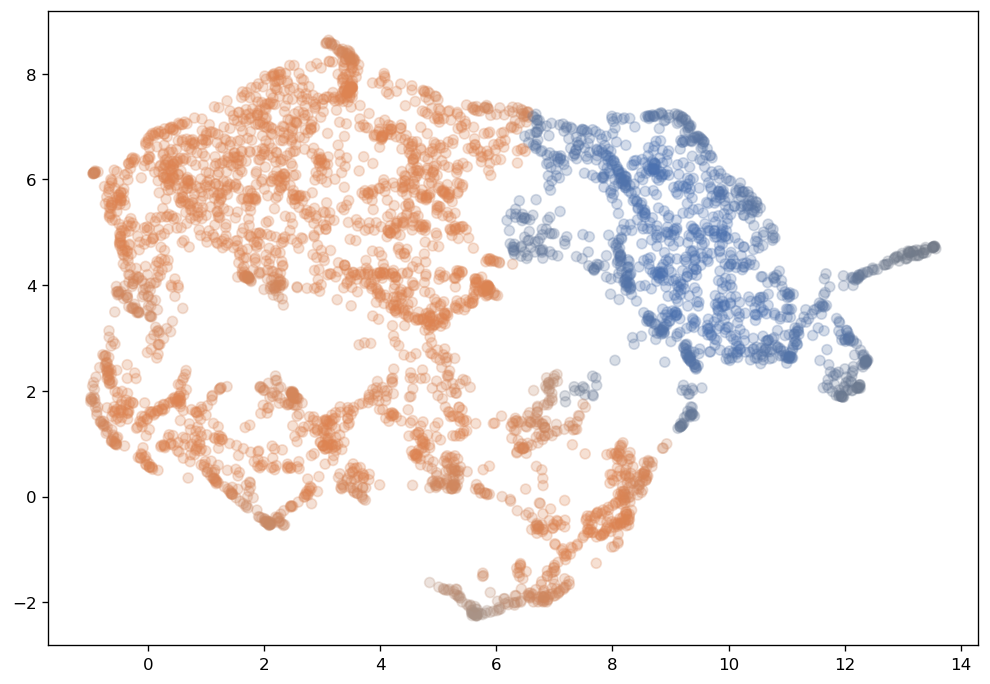

In [45]:
%%time
# Sub model
sub_output = utils.clustering_wrapper(
    sample,
    features,
    RANDOM_SEED,
    hypers_hdbscan,
    plot_sample_size = len(sample),
    force_predict = FORCE_PREDICT,
    include_noise = INCLUDE_NOISE
)

In [33]:
sub_output['metrics']

{'n_clusters': 3,
 'percent_clustered': 100.0,
 'sil_score': 0.23373145,
 'pielou_evenness': 0.9815005513404854}

In [34]:
output['metrics']

{'n_clusters': 3,
 'percent_clustered': 100.0,
 'sil_score': 0.28752503,
 'pielou_evenness': 0.9546506767396167}

In [35]:
# Get fitted transformers
sub_scaler = sub_output['scaler']
sub_reducer = sub_output['reducer']
sub_clusterer = sub_output['clusterer']

In [36]:
# Scale using provided sub scaler
sub_df_scaled = utils.zscore_predict(raw, features, sub_scaler)

In [37]:
# Reduce
sub_embedding = utils.umap_predict(sub_reducer, sub_df_scaled)

In [38]:
# Predict
sub_scores = utils.hdbscan_predict(sub_embedding, sub_df_scaled, sub_clusterer, force_predict=FORCE_PREDICT)

In [39]:
sub_scores.head(3)

score  cluster         0         1   BALANCE  BALANCE_FREQUENCY  \
0  0.278342        1  5.407554  2.212049 -0.740377          -0.366013   
1  0.996970        0  9.106615  5.049531  0.766100           0.070420   
2  0.523680        2  1.688420  4.273179  0.429065           0.506853   

   CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  CREDIT_LIMIT  ...  \
0     -0.458555               -0.683446         -0.469522     -0.957502  ...   
1      2.509877                0.557846          0.092200      0.666060  ...   
2     -0.458555               -0.683446         -0.469522      0.801357  ...   

   MINIMUM_PAYMENTS  ONEOFF_PURCHASES  ONEOFF_PURCHASES_FREQUENCY  PAYMENTS  \
0         -0.336287         -0.368043                   -0.683117 -0.536697   
1          0.094674         -0.368043                   -0.683117  0.791659   
2         -0.110938          0.106010                    2.639773 -0.393598   

   PRC_FULL_PAYMENT  PURCHASES  PURCHASES_FREQUENCY  \
0         -0.528041  -0.447812            -0.825806   
1          0.223076  -0.494135            -1.240095   
2         -0.528041  -0.118715             1.245634   

   PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX    TENURE  
0                         -0.725554      -0.531988  0.355067  
1                         -0.934373      -0.613383  0.355067  
2                         -0.934373      -0.125014  0.355067  

[3 rows x 21 columns]

In [40]:
adjusted_rand_score(scores['cluster'], sub_scores['cluster'])

0.3491000343162643

In [41]:
sub_scores['cluster'].value_counts()

2    3246
1    3190
0    2200
Name: cluster, dtype: int64

# End

In [42]:
df = raw.copy()

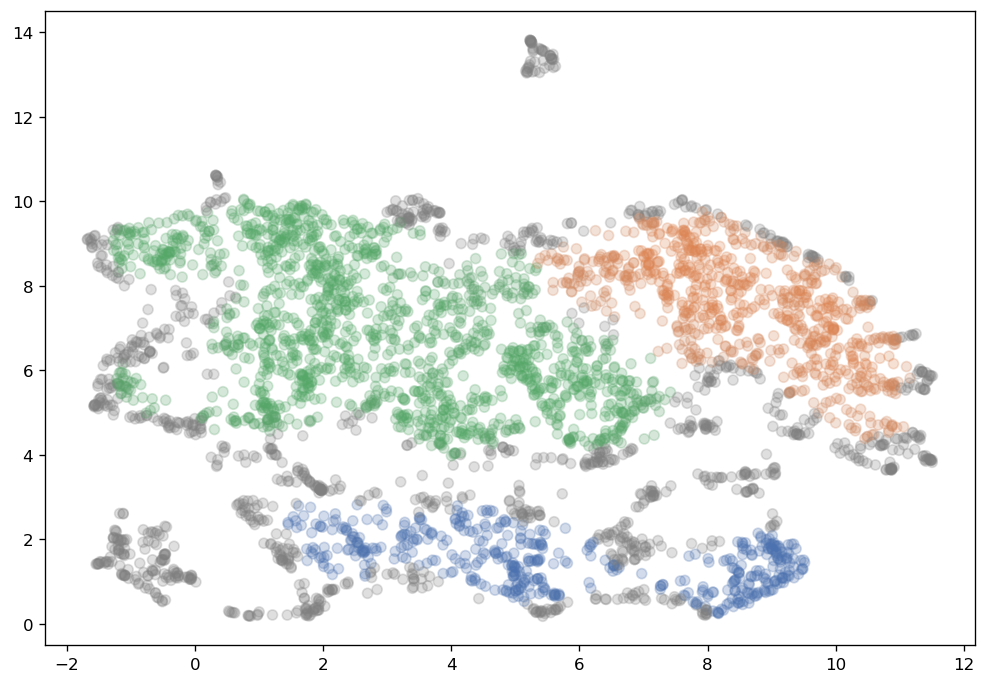

In [283]:

# Time
t0 = time.time()

# Fit zscorer
scaler = zscore_fit(df, features)

# Transform
df_scaled = zscore_predict(df, features, scaler)

# Fit umap transformer
reducer = umap_fit(df_scaled, RANDOM_SEED)

# Reduce
embedding = umap_predict(reducer, df_scaled)

# Initialize
clusterer = hdbscan_fit(embedding, hypers_hdbscan)

# Predict
scores = hdbscan_predict(embedding, df_scaled, clusterer)
scores.index = df['CUST_ID']
scores.reset_index(inplace=True)

# Get reporting metrics
metrics = reporting_metrics(scores)

# Define n_clusters
n_clusters = metrics['n_clusters']

# Get colors
colors = color_setter(n_clusters, scores)

# Plot
plot_clusters(embedding, plot_sample_size, colors['cluster_member_colors'])
